# Bonds

### BUSI 721: Data-Driven Finance I
### Kerry Back, Rice University

### Coupons and Face Value

- Pay a specified coupon at regular intervals (usually semi-annually).
- And pay face value (= par value) at maturity.  Last payment is coupon plus face.
- Usually in $1,000 denominations.  
- Example: a 6% bond with $1,000 face value pays 3% x $1,000 = $30 every six months.


### Coupon rates

- The coupon on a bond is usually set so that it can be issued at or near face value.
- This requires setting the coupon at the market interest (for a bond of its maturity and credit quality).
- Investment banks assist companies and municipalities in setting coupons and issuing bonds.
- The U.S. Treasury runs auctions - buyers bid in rates and low bidders win.  The coupon is set at the marginal rate.
- [Upcoming Auctions](https://www.treasurydirect.gov/auctions/upcoming/)

### The bond market

- Many, many different bonds outstanding.  Most do not trade in any given period.
- Trade via dealers - contact a dealer to get a quote - rather than on exchanges.
- Mostly an institutional market.
- Better to buy bonds through ETFs than buy them directly, except maybe Treasury bonds through Treasury Direct.

![](images/chevron_debt.PNG)

### Coupons vs Yields 

- The coupon rate of a bond is set at the time of its issue.
- However, what one anticipates earning on a bond varies with the market price.
  - Price < par $\Rightarrow$ coupon + capital gain
  - Price > par $\Rightarrow$ coupon - capital loss
- What one would earn per year on a bond if held to maturity (assuming no default) is called the bond yield.  

### Yield calculation example

- Bond trading at 90% of par
- Paying 5% coupon
- Next coupon in six months, matures in 2 years
- Do semi-annual discounting at the annual rate / 2
- Yield is $y=2r$ where
$$ 0 = - 90 + \frac{2.50}{1+r} +  \frac{2.50}{(1+r)^2} + \frac{2.50}{(1+r)^3} + \frac{102.50}{(1+r)^4}$$
- In other words, $r$ is the IRR of the cash flows from buying the bond at 90 and holding until maturity.

In [10]:
import numpy_financial as npf 

cash_flows = [-90, 2.5, 2.5, 2.5, 102.5]
r = npf.irr(cash_flows)
y = 2*r
print(f"The bond yield is {y:.2%}")

The bond yield is 10.69%


In this example, you are getting, roughly,

- 5% per year from the coupons
- a 10% capital gain in 2 years $\sim$ 5% per year
- so approximately 10% per year

### Bond price is the PV of the cash flows 

- A bond price is the PV of its cash flows when discounted at the yield.

$$\text{Price} = \frac{\text{coup}}{1+y/2} +  \frac{\text{coup}}{(1+y/2)^2} + \cdots + \frac{\text{coup}+\text{face}}{(1+y/2)^{2n}}$$
where $y=$ yield and $n=$ number of years to maturity.

### Example

- 5-year bond with 6% coupon rate and 8% yield
- $1,000 face value
- calculate price

In [11]:
import numpy as np

In [12]:
years = 5
coupon = 1000 * 0.06 / 2
yld = 0.08

PV_factors = (1+yld/2)**np.arange(-1, -2*years-1, -1)
cash_flows = (coupon) * np.ones(2*years)
cash_flows[-1] += 1000
price = np.sum(PV_factors * cash_flows)

print(f"price is ${price:.2f}")

price is $918.89


In [13]:
# check yield

cash_flows = np.concatenate(([-price], cash_flows))
r = npf.irr(cash_flows)
print(f"yield is {2*r:.2%}")

yield is 8.00%


### Long-term bonds are riskier than short-term bonds

- Let y = bond yield.
- Consider a cash flow C that is n years away.  Its PV is
$$\text{PV} = \frac{C}{(1+y/2)^{2n}} = C(1+y/2)^{-2n}$$
- How does this change when the yield changes?
$$\frac{d}{dy} C(1+y/2)^{-2n} = - nC(1+y/2)^{-2n-1} = - n \times \frac{PV}{(1+y/2)}$$
- So the percent change in the value is
$$-n(1+y/2)$$

### Term structure of interest rates

- Term structure = how Treasury yields depend on maturity of bond
- Usually longer-term yields are higher
- But it varies a lot over time
- [Learn Investments](https://learn-investments.rice-business.org/fixed-income/termstructure)

### Fed funds rate

- The Federal funds rate is an overnight rate that is targeted by the Federal Reserve
- The Fed borrows or lends in the market to push the equilibrium rate to the rate they want
- Long-term rates tend to move up and down with the Fed funds rate

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<AxesSubplot: xlabel='fedfunds', ylabel='10yr'>

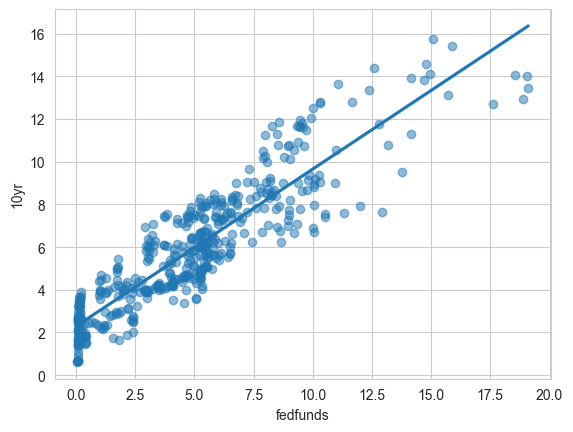

In [15]:
from pandas_datareader import DataReader as pdr
rates = pdr(["FEDFUNDS", "DGS10"], "fred", start=1900).dropna()
rates.columns = ["fedfunds", "10yr"]
sns.regplot(x="fedfunds", y="10yr", data=rates, ci=None, scatter_kws={"alpha": 0.5})

### TIPS (Treasury Inflation Protected Securities)

- The Treasury issues bonds with payments indexed to inflation.
- 4% inflation $\Rightarrow$ all future coupons and the face value go up by 4%.
- This is cumulative.  So each coupon and the face value are adjusted for all past inflation.
- Example: a $1,000 denomnation 2% TIPS issued today will pay $10 in today's dollars each 6 months and pay $1,000 in today's dollars at maturity.


### Treasury yields and TIPS yields

- Get 10 year Treasury yields and TIPS yields from FRED (Federal Reserve Economic Data)
- Calculate the difference in yields
- Difference depends on inflation expectations

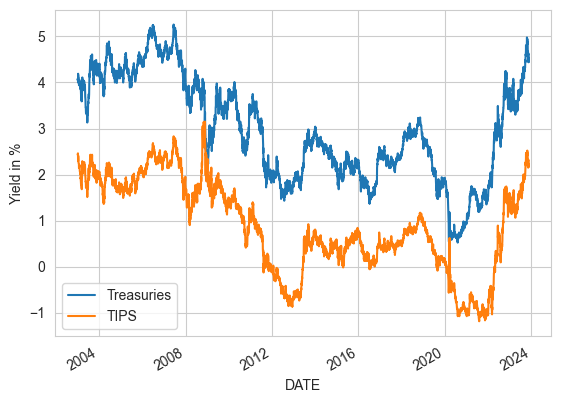

In [16]:
yields = pdr(["DGS10", "DFII10"], "fred", start=1900).dropna()
yields.columns = ["Treasuries", "TIPS"]
yields.plot()
plt.ylabel("Yield in %")
plt.show()

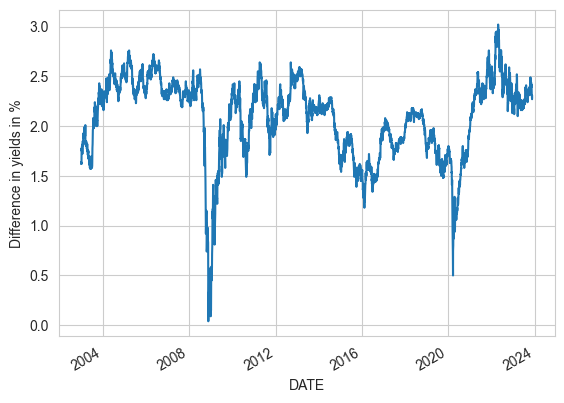

In [17]:
(yields.Treasuries - yields.TIPS).plot()
plt.ylabel("Difference in yields in %")
plt.show()

### Fixed income universe

- Treasuries
- corporates
- municipals
- asset backed securities
  - mortgage backed securities
  - credit-card receivables, other receivables
  - collateralized debt obligations
- Asset backed securities enable the spreading of risks among more investors.  For example, pension funds hold mortgages.  Also instrumental in financial crisis.

### Municipal bonds

- Municipal bonds in the U.S. are exempt from federal income tax.
- Municipal bonds are also exempt from state income taxes in the state of issue.
- So, NY investors want to hold NY municipals, California investors want to hold California municipals.
- Municipals are issued by states, cities, counties, school boards, fire districts, ...
- Tax increment financing allows limited use of municipal bonds to back private investments: sports stadiums, etc.